In [349]:
import pandas as pd
from pandas.tseries.offsets import BDay
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import datasets
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression



isBusinessDay = BDay().onOffset
eth = 'Datasets/ETH2.csv'
eth_df = pd.read_csv(eth)
match_series = pd.to_datetime(eth_df['Date']).map(isBusinessDay)
eth_df = eth_df[match_series]
eth_df

/Users/sareddyrojareddy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/base.py:870: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


,Date,Price,Open,High,Low,Vol.,Change %
0,1-Mar-22,2949.28,2922.44,3036.59,2858.54,917.00K,0.0092
1,28-Feb-22,2922.50,2616.34,2949.44,2574.12,899.19K,0.1170
4,25-Feb-22,2767.53,2596.52,2830.31,2573.39,828.87K,0.0659
5,24-Feb-22,2596.52,2578.54,2732.02,2303.07,1.85M,0.0071
6,23-Feb-22,2578.15,2637.38,2749.80,2578.15,636.50K,-0.0220
...,...,...,...,...,...,...,...
2176,16-Mar-16,12.88,13.06,13.89,12.62,19.24K,-0.0138
2177,15-Mar-16,13.06,12.63,13.42,11.98,39.73K,0.0448
2178,14-Mar-16,12.50,15.07,15.07,11.40,92.18K,-0.1705
2181,11-Mar-16,11.95,11.75,11.95,11.75,0.18K,0.0170


In [218]:
bitcoin = 'Datasets/BTC.csv'
bitcoin_df = pd.read_csv(bitcoin)
match_series_bitcoin = pd.to_datetime(bitcoin_df['Date']).map(isBusinessDay)
bitcoin_df = bitcoin_df[match_series_bitcoin]
bitcoin_df

/Users/sareddyrojareddy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/base.py:870: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


,Date,Price,Open,High,Low,Vol.,Change %
0,3/2/22,44151.1,44442.0,44777.0,43876.0,6.13K,-0.0065
1,3/1/22,44442.0,43202.0,44939.0,42878.0,6.34K,0.0287
2,2/28/22,43202.0,37734.0,44198.0,37502.0,8.45K,0.1449
5,2/25/22,39243.0,38380.0,39717.0,38071.1,6.43K,0.0225
6,2/24/22,38380.0,37292.0,39716.0,34435.0,17.88K,0.0292
...,...,...,...,...,...,...,...
3671,2/8/12,5.6,5.6,5.6,5.6,-,-0.0158
3672,2/7/12,5.7,5.7,5.7,5.7,-,0.0440
3673,2/6/12,5.4,5.4,5.4,5.4,-,-0.0422
3676,2/3/12,6.0,6.0,6.0,6.0,-,-0.0230


In [219]:
#Reading tesla,gold and S&P

tesla_df = pd.read_csv('Datasets/Tesla.csv')
tesla_df = tesla_df.rename(columns={"Close/Last": "Last_tesla","Volume":"Trading_Volume_Tesla","Open": "Open_tesla","High": "High_tesla","Low": "Low_tesla"})
tesla_df['Change_Tesla'] = (tesla_df['Open_tesla'] - tesla_df['Last_tesla'])/tesla_df['Open_tesla']

gold_df = pd.read_csv('Datasets/Gold.csv')
gold_df = gold_df.rename(columns={"Close/Last": "Last_gold","Volume":"Trading_Volume_Gold","Open": "Open_gold","High": "High_gold","Low": "Low_gold"})
gold_df['Change_Gold'] = (gold_df['Open_gold'] - gold_df['Last_gold'])/gold_df['Open_gold']


sp_df = pd.read_csv('Datasets/SP500.csv')
sp_df = sp_df.rename(columns={"Close/Last": "Last_SP","Volume":"Trading_Volume_SP","Open": "Open_SP","High": "High_SP","Low": "Low_SP"})
sp_df['Change_SP'] = ((sp_df['Open_SP'] - sp_df['Last_SP'])/sp_df['Open_SP'])*100

sp_df


,Date,Last_SP,Trading_Volume_SP,Open_SP,High_SP,Low_SP,Change_SP
0,02/28/2022,4373.94,--,4354.17,4388.84,4315.12,-0.454047
1,02/25/2022,4384.65,--,4298.38,4385.34,4286.83,-2.007035
2,02/24/2022,4288.70,--,4155.77,4294.73,4114.65,-3.198685
3,02/23/2022,4225.50,--,4324.93,4341.51,4221.51,2.298997
4,02/22/2022,4304.76,--,4332.74,4362.12,4267.11,0.645781
...,...,...,...,...,...,...,...
2546,03/07/2012,1352.63,--,1343.39,1354.85,1343.39,-0.687812
2547,03/06/2012,1343.36,--,1363.63,1363.63,1340.03,1.486474
2548,03/05/2012,1364.33,--,1369.59,1369.59,1359.13,0.384057
2549,03/02/2012,1369.63,--,1374.09,1374.53,1366.42,0.324578


In [242]:
#rename columns
eth_df = eth_df.rename(columns ={"Price": "Last_eth","Open": "Open_eth","High": "High_eth","Low": "Low_eth","Change %":"Change_ETH"})
bitcoin_df = bitcoin_df.rename(columns={"Price": "Last_bitcoin","Open": "Open_bitcoin","High": "High_bitcoin","Low": "Low_bitcoin","Change %":"Change_BTC"})

#create dataframe using ETH and Bitcoin datasets
#crypto = pd.DataFrame(eth_df,columns=['Date','Last_eth','Change_ETH'])

crypto = pd.DataFrame(bitcoin_df,columns=['Date','Last_bitcoin','Change_BTC'])


crypto = crypto.join(eth_df['Last_eth'])
crypto = crypto.join(eth_df['Change_ETH'])
#crypto = crypto.join(bitcoin_df['High_bitcoin'])
#crypto = crypto.join(bitcoin_df['Low_bitcoin'])
crypto = crypto.join(tesla_df['Last_tesla'])
crypto = crypto.join(tesla_df['Trading_Volume_Tesla'])
crypto = crypto.join(tesla_df['Change_Tesla'])

crypto = crypto.join(gold_df['Last_gold'])
crypto = crypto.join(gold_df['Trading_Volume_Gold'])
crypto = crypto.join(gold_df['Change_Gold'])

crypto = crypto.join(sp_df['Last_SP'])
crypto = crypto.join(sp_df['Change_SP'])

crypto = crypto.replace([np.inf, -np.inf], np.nan)
crypto = crypto.dropna()
crypto



#crypto['Increase/Decrease'] = np.where(crypto['Change_BTC'] < 0, False, True)


#Increased = crypto[crypto['Increase/Decrease'] == True]
#Decreased = crypto[crypto['Increase/Decrease'] == False]

crypto.head()


,Date,Last_bitcoin,Change_BTC,Last_eth,Change_ETH,Last_tesla,Trading_Volume_Tesla,Change_Tesla,Last_gold,Trading_Volume_Gold,Change_Gold,Last_SP,Change_SP
0,3/2/22,44151.1,-0.0065,2949.28,0.0092,870.43,33002290.0,-0.067999,1900.7,239416.0,0.010567,4373.94,-0.454047
1,3/1/22,44442.0,0.0287,2922.50,0.1170,809.87,25355920.0,-0.000791,1887.6,220963.0,0.009913,4384.65,-2.007035
5,2/25/22,39243.0,0.0225,2596.52,0.0071,856.98,22833950.0,0.032754,1899.8,155484.0,0.000841,4348.87,0.814219
6,2/24/22,38380.0,0.0292,2578.15,-0.0220,876.35,18392810.0,0.040416,1902.0,251680.0,-0.016026,4380.26,1.701054
7,2/23/22,37292.0,-0.0263,2636.13,0.0258,923.39,17098130.0,-0.010218,1871.5,136348.0,-0.008623,4475.01,-0.432250


41


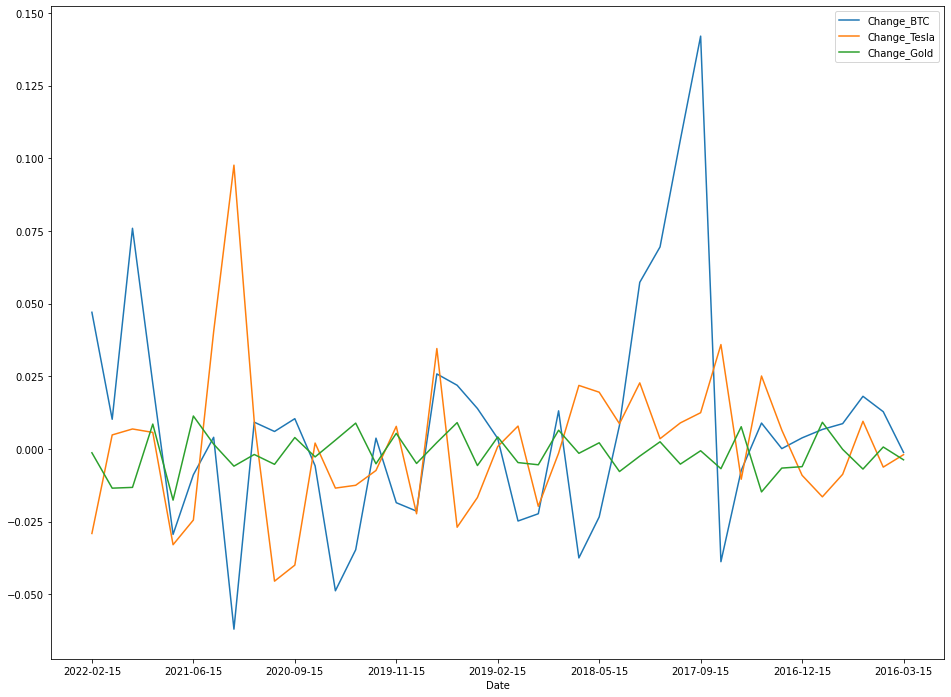

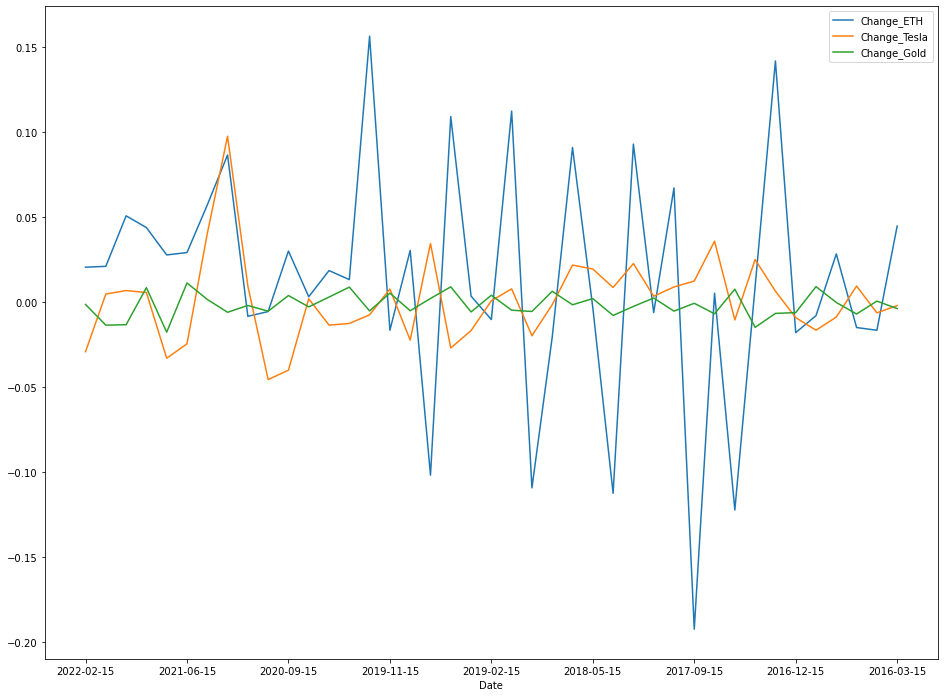

In [281]:
#crypto['Date'] = pd.to_datetime(crypto['Date'])
crypto_subset = crypto
#crypto_subset = crypto[crypto.Date.str.match(r'^.*/15/.*')]
crypto_subset['Date'] = crypto_subset['Date'].astype(str)
crypto_subset = crypto_subset[crypto_subset.Date.str.match(r'^\d.*-\d.*-15')]
#mask = (crypto['Date'] >= '1/1/22')
#crypto_subset = crypto[mask]

print(crypto_subset['Date'].count())

#plot of BTC correlation with gold and tesla stocks
crypto_subset.plot(x="Date",y=["Change_BTC","Change_Tesla","Change_Gold"],figsize=(16,12))
plt.show()

#plot of ETH correlation with gold and tesla stocks
crypto_subset.plot(x="Date",y=["Change_ETH","Change_Tesla","Change_Gold"],figsize=(16,12))
plt.show()

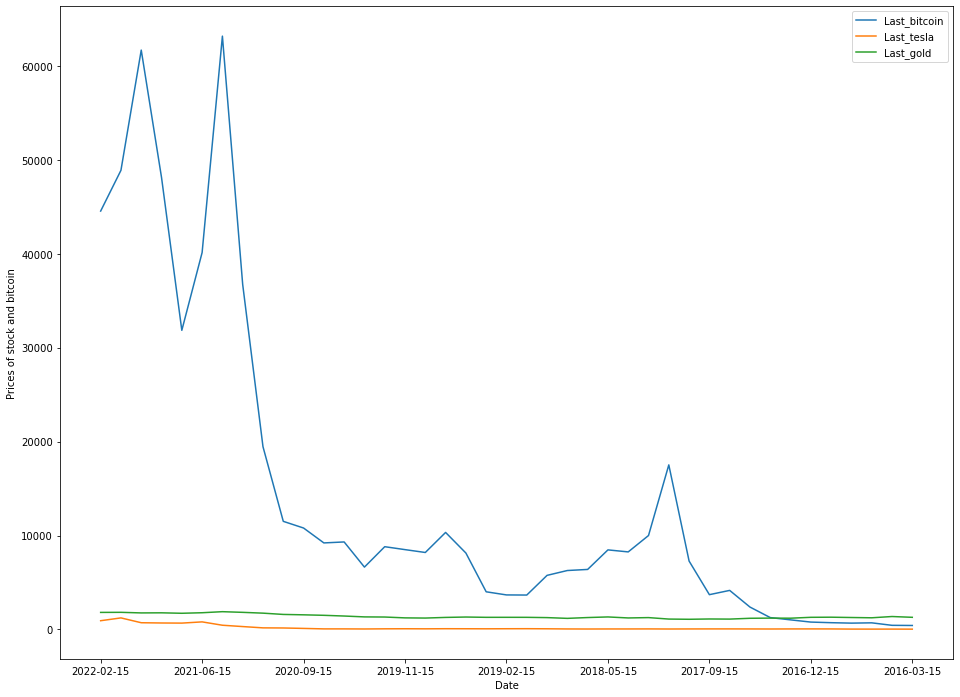

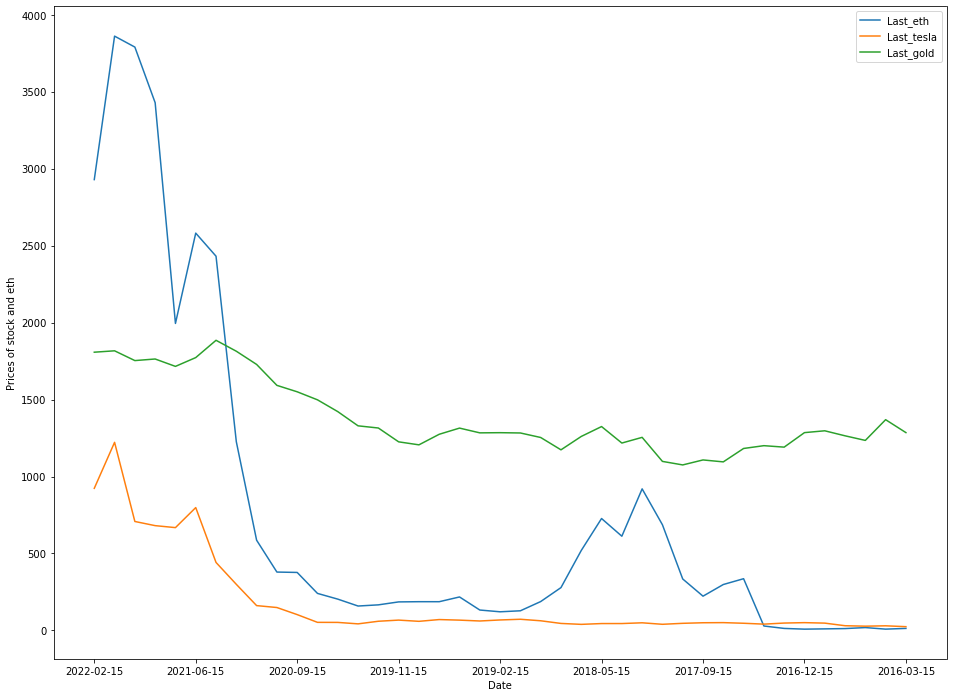

In [324]:
#plot of BTC correlation with gold and tesla stock prices
crypto_subset.plot(x="Date",y=["Last_bitcoin","Last_tesla","Last_gold"],figsize=(16,12))
plt.ylabel("Prices of stock and bitcoin")
plt.show()

#plot of ETH correlation with gold and tesla stock prices
crypto_subset.plot(x="Date",y=["Last_eth","Last_tesla","Last_gold"],figsize=(16,12))
plt.ylabel("Prices of stock and eth")
plt.show()

In [297]:
#Categorizing

def categorise(row):  
    if row['Change_BTC'] <= 0 :
        return 0
        
    return 1

def categorise_eth(row):  
    if row['Change_ETH'] <= 0 :
        return 0
        
    return 1

crypto['Increase/Decrease'] = crypto.apply(lambda row: categorise(row), axis=1)
crypto

crypto['Increase/Decrease_ETH'] = crypto.apply(lambda row: categorise_eth(row), axis=1)


crypto.to_csv('crypto.csv')



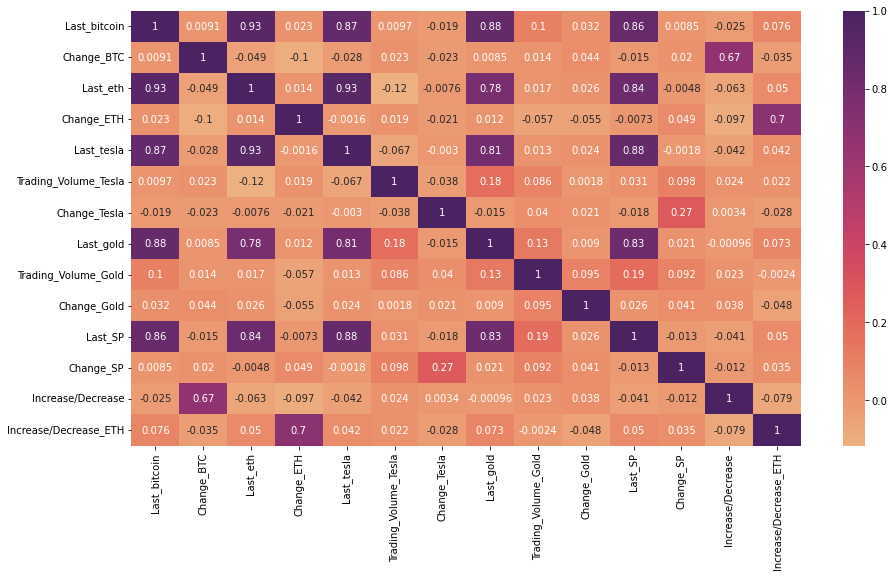

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



#heatmap
plt.figure(figsize = (15,8))
corr = crypto.corr()

#plot correlation matrix heatmap
hm = sns.heatmap(data = corr, annot = True, cmap = sns.color_palette("flare", as_cmap=True))

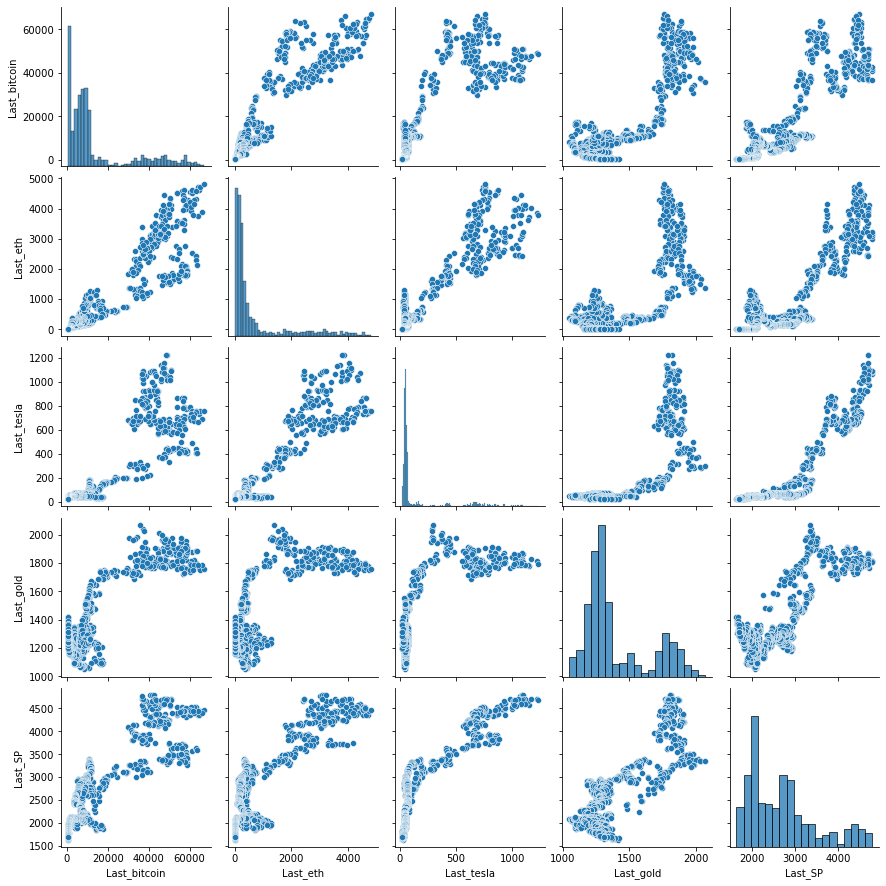

In [340]:
#Visualizing using pair plots

sns.pairplot(data = crypto,x_vars=["Last_bitcoin","Last_eth","Last_tesla","Last_gold","Last_SP"],
            y_vars=["Last_bitcoin","Last_eth","Last_tesla","Last_gold","Last_SP"])

In [343]:
#Q3
#Multiple Linear regression for Bitcoin and other stock values
model_fit_bitcoin = smf.ols('Last_bitcoin ~ Last_tesla+Last_gold+Last_SP',data = crypto).fit()
print(model_fit_bitcoin.summary())

#Multiple Linear regression for ETH and other stock values
model_fit_eth = smf.ols('Last_eth ~ Last_tesla+Last_gold+Last_SP',data = crypto).fit()
print(' ')
print(' ')
print(' ')
print(model_fit_eth.summary())

#Q8 - What are Principal components selected
#since the stock values are correlated, I tried using only one Stock value and tried applying with only one stock values 
#like below, but the R-square value was less compared to when using with all stock values as predictors
model_fit_bitcoin_reduced = smf.ols('Last_bitcoin ~ Last_gold',data = crypto).fit()
print(' ')
print(' ')
print(' ')
print(model_fit_bitcoin_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:           Last_bitcoin   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     2423.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        06:37:45   Log-Likelihood:                -12612.
No. Observations:                1237   AIC:                         2.523e+04
Df Residuals:                    1233   BIC:                         2.525e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.315e+04   1692.253    -25.501      0.0

In [224]:
def positive_observations(y):
    # What percentage of observations are positive?
    proportion_1 = ((y == 1).sum() / len(y))
    pct_1        = np.around(proportion_1*100, decimals=3)
    display(HTML('<p><h4>{}%</h4>of observations are positive</p>'.format(pct_1)))


# Classifier stats
# -------------------------------------------------

def prior_error_rate(confusion_matrix):
    """The prior probability that a result is positive"""
    return 1 - (np.sum(confusion_mtx[1, :]) / np.sum(confusion_mtx))

def total_error_rate(confusion_matrix):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)

def true_positive_rate(confusion_mtx):
    """or sensitivity: the proportion of actual POSITIVES that are correctly identified as such"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[1, :])

def false_negative_rate(confusion_mtx):
    """the proportion of actual POSITIVES that are incorrectly identified as negative"""
    return confusion_mtx[1, 0] / np.sum(confusion_mtx[1, :])

def false_positive_rate(confusion_mtx):
    """the proportion of actual NEGATIVES that are incorrectly identified as positives"""
    return confusion_mtx[0, 1] / np.sum(confusion_mtx[0, :])

def true_negative_rate(confusion_mtx):
    """or specificity: the proportion of actual NEGATIVES that are correctly identified as such"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[0, :])

def positive_predictive_value(confusion_mtx):
    """or precision: the proportion of predicted positives that are correctly predicted"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[:, 1])

def negative_predictive_value(confusion_mtx):
    """the proportion of predicted negatives that are correctly predicted"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[:, 0])

def classifier_stats(confusion_mtx):
    return pd.Series({'prior_error_rate': prior_error_rate(confusion_mtx),
                      'total_error_rate': total_error_rate(confusion_mtx),
                      'true_positive_rate (sensitivity)': true_positive_rate(confusion_mtx),
                      'false_negative_rate': false_negative_rate(confusion_mtx),
                      'false_positive_rate': false_positive_rate(confusion_mtx),
                      'true_negative_rate (specificity)': true_negative_rate(confusion_mtx),
                      'positive_predictive_value (precision)': positive_predictive_value(confusion_mtx),
                      'negative_predictive_value': negative_predictive_value(confusion_mtx)})

In [226]:
#Q3 Fitting Model using QDA


crypto['Change_SP'] = crypto['Change_SP'].astype('float32')

x = crypto[['Last_tesla','Change_Tesla','Last_gold','Change_Gold','Last_SP','Change_SP']]
y = crypto['Increase/Decrease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train_1 = np.array(x_train)
y_train_1 = np.array(y_train)

#print(np.isnan(x_train_1).any())

#x_train_1 = np.nan_to_num(x_train_1)


# Fit model
qda_fit = QuadraticDiscriminantAnalysis()
model_qda = qda_fit.fit(x_train_1, y_train_1)
y_pred_qda = model_qda.predict(x_test)

y_pred_qda

confusion_mtx = confusion_matrix(y_test, y_pred_qda)
display(confusion_table(confusion_mtx))

qda_stats = classifier_stats(confusion_mtx)
qda_stats

,y_pred=0,y_pred=1,Total
,,,
y=0,34,71,105
y=1,41,102,143
Total,75,173,


prior_error_rate                         0.423387
total_error_rate                         0.451613
true_positive_rate (sensitivity)         0.713287
false_negative_rate                      0.286713
false_positive_rate                      0.676190
true_negative_rate (specificity)         0.323810
positive_predictive_value (precision)    0.589595
negative_predictive_value                0.453333
dtype: float64

In [292]:
#Q3 Fitting Model using KNN

#model for k=3
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model_fit = KNN_model.fit(preprocessing.scale(x_train_1),y_train_1)

KNN_predict = KNN_model_fit.predict(x_test) #Predictions on Testing data
KNN_predict

confusion_mtx_knn = confusion_matrix(y_test, KNN_predict)
display(confusion_table(confusion_mtx_knn))

knn_stats = classifier_stats(confusion_mtx_knn)
knn_stats

,y_pred=0,y_pred=1,Total
,,,
y=0,7,98,105
y=1,9,134,143
Total,16,232,


prior_error_rate                         0.423387
total_error_rate                         0.451613
true_positive_rate (sensitivity)         0.937063
false_negative_rate                      0.062937
false_positive_rate                      0.933333
true_negative_rate (specificity)         0.066667
positive_predictive_value (precision)    0.577586
negative_predictive_value                0.437500
dtype: float64

Evaluation using k-fold for QDA Model: 
--> folds=2, accuracy=0.539 (0.521,0.557)
--> folds=3, accuracy=0.525 (0.510,0.545)
--> folds=4, accuracy=0.525 (0.515,0.539)
--> folds=5, accuracy=0.548 (0.510,0.573)
--> folds=6, accuracy=0.525 (0.481,0.575)
--> folds=7, accuracy=0.534 (0.508,0.559)
--> folds=8, accuracy=0.533 (0.465,0.600)
--> folds=9, accuracy=0.529 (0.496,0.572)
--> folds=10, accuracy=0.532 (0.480,0.613)
--> folds=11, accuracy=0.535 (0.500,0.584)
--> folds=12, accuracy=0.533 (0.456,0.621)
--> folds=13, accuracy=0.538 (0.463,0.600)
--> folds=14, accuracy=0.530 (0.466,0.648)
--> folds=15, accuracy=0.537 (0.488,0.602)
--> folds=16, accuracy=0.537 (0.442,0.654)
--> folds=17, accuracy=0.526 (0.444,0.616)
--> folds=18, accuracy=0.532 (0.449,0.652)
--> folds=19, accuracy=0.538 (0.431,0.631)
--> folds=20, accuracy=0.529 (0.435,0.677)
--> folds=21, accuracy=0.529 (0.441,0.644)
--> folds=22, accuracy=0.526 (0.393,0.714)
--> folds=23, accuracy=0.531 (0.415,0.648)
--> folds=24, accuracy

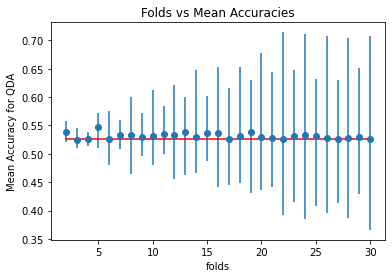

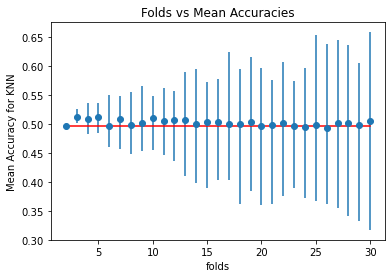

In [334]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut

#Q5 Obtain the estimate for the test error using K-fold cross validation



folds = range(2,31)
# prepare the cross-validation procedure
#cv = KFold(n_splits=10, random_state=1, shuffle=True)
means, mins, maxs = list(),list(),list()
means_knn, mins_knn, maxs_knn = list(),list(),list()

# evaluate each k value
#applying k-fold cv for QDA Model   
print('Evaluation using k-fold for QDA Model: ')
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # create model
    #model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(model_qda, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # evaluate k value
    k_mean, k_min, k_max = np.mean(scores), scores.min(), scores.max()
    # report performance
    print('--> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

#applying k-fold cv for knn Model  
print(' ')
print(' ')
print('Evaluation using k-fold for KNN Model: ')
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # create model
    #model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(KNN_model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # evaluate k value
    k_mean, k_min, k_max = np.mean(scores), scores.min(), scores.max()
    # report performance
    print('--> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means_knn.append(k_mean)
    # store min and max relative to the mean
    mins_knn.append(k_mean - k_min)
    maxs_knn.append(k_max - k_mean)
    
#Leaveone out cv
leave_cv =  LeaveOneOut()
scores_qda = cross_val_score(model_qda, x, y, scoring='accuracy', cv=leave_cv, n_jobs=-1)
ideal_qda = np.mean(scores_qda)
#print(ideal_qda)
scores_knn = cross_val_score(KNN_model, x, y, scoring='accuracy', cv=leave_cv, n_jobs=-1)
ideal_knn = np.mean(scores_knn)
#print(ideal_knn)

#plot for QDA means
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal_qda for _ in range(len(folds))], color='r')
# show the plot
plt.title('Folds vs Mean Accuracies')
plt.xlabel('folds')
plt.ylabel('Mean Accuracy for QDA')
plt.show()

#plot for KNN means
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means_knn, yerr=[mins_knn, maxs_knn], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal_knn for _ in range(len(folds))], color='r')
# show the plot
plt.title('Folds vs Mean Accuracies')
plt.xlabel('folds')
plt.ylabel('Mean Accuracy for KNN')
plt.show()

# report performance
#print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy QDA: 0.525
Accuracy KNN: 0.497


In [352]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error


x_ridge = crypto[['Last_tesla','Last_gold','Last_SP']]
y_ridge = crypto['Last_bitcoin']

x_ridge_train,x_ridge_test,y_ridge_train,y_ridge_test=train_test_split(x_ridge,y_ridge,test_size=0.2)

lambda_ = (np.logspace(10, -2, num=50))

ridgecv = RidgeCV(alphas = lambda_, scoring = 'neg_mean_squared_error', normalize = True).fit(x_ridge, y_ridge)
ridgecv.alpha_

0.01

In [367]:
lambda_val = ridgecv.alpha_
ridge_regr = Ridge(alpha = lambda_val, normalize = True)
ridge_fit = ridge_regr.fit(x_ridge_train, y_ridge_train)
ridge_pred = ridge_fit.predict(x_ridge_test)
print(ridge_fit.coef_[0])
print(ridge_fit.intercept_)
mse_ridge = mean_squared_error(y_ridge_test, ridge_pred)


21.11406642296083
-43520.038387095876


In [371]:
#Q4 Compute the LOOCV errors from fitting the two models. 
model_multiple = LinearRegression();
#model_multiple_fit = model_multiple.fit(x_ridge,y_ridge);
#multiple_pred = model_multiple_fit.predict(x_ridge_test)
scores_multiple = cross_val_score(model_multiple, x_ridge, y_ridge, scoring='neg_mean_absolute_error',cv=leave_cv, n_jobs=-1)
print('MSE of Multiple Regression : %.3f' % (np.mean(scores_multiple)))


scores_qda = cross_val_score(model_qda, x, y, scoring='accuracy', cv=leave_cv, n_jobs=-1)
print('Accuracy QDA: %.3f' % (np.mean(scores_qda)))

scores_knn = cross_val_score(KNN_model, x, y, scoring='accuracy', cv=leave_cv, n_jobs=-1)
print('Accuracy KNN: %.3f' % (np.mean(scores_knn)))

#model_fit_bitcoin
scores_ridge = cross_val_score(ridge_regr, x_ridge_test, y_ridge_test, scoring='neg_mean_absolute_error',cv=leave_cv, n_jobs=-1)

print('MSE of Ridge Regression : %.3f' % (np.mean(scores_ridge)))


MSE of Multiple Regression : -4751.588
Accuracy QDA: 0.525
Accuracy KNN: 0.497
MSE of Ridge Regression : -4979.095
